# Exploratory Data Analysis (EDA)

This notebook explores relationships between passenger features and survival outcomes in the Titanic dataset using visualizations and summary statistics. The goal of this analysis is to better understand patterns and trends in the data, identify potential predictors of survival, and uncover insights that can inform feature engineering for predictive modeling.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df = pd.read_csv("../EDA/titanic_cleaned_training_data.csv")

In [10]:
df.head()
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    int64  
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   TitleGroup  891 non-null    object 
 8   FamilySize  891 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 62.8+ KB


Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
TitleGroup    0
FamilySize    0
dtype: int64

In [12]:
df["SexLabel"] = df["Sex"].map({0: "Male", 1: "Female"})

## Plot 1 — Survival vs Gender

<Figure size 640x480 with 0 Axes>

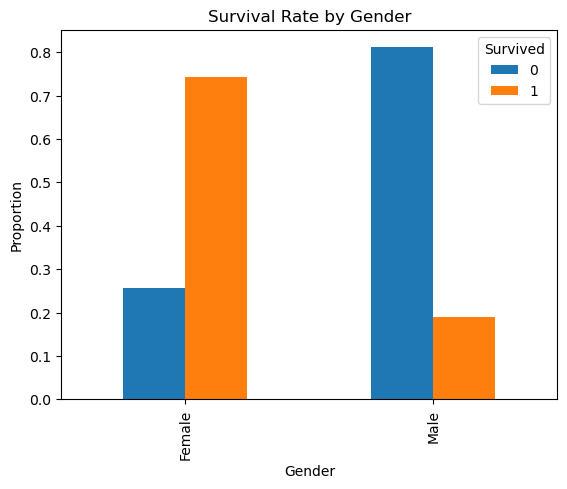

In [13]:
survival_gender = pd.crosstab(df["SexLabel"], df["Survived"], normalize="index")

plt.figure()
survival_gender.plot(kind="bar")
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.legend(title="Survived")
plt.show()

**Observation:**  
Female passengers had a significantly higher survival rate compared to male passengers.
The bar plot shows that the majority of females survived, while most male passengers did not.
This reflects the “women and children first” evacuation policy followed during the disaster.


## Plot 2 — Survival vs Passenger Class

<Figure size 640x480 with 0 Axes>

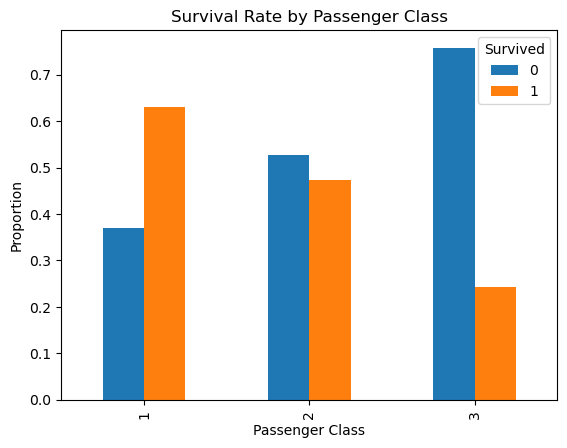

In [14]:
survival_class = pd.crosstab(df["Pclass"], df["Survived"], normalize="index")

plt.figure()
survival_class.plot(kind="bar")
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Proportion")
plt.legend(title="Survived")
plt.show()

**Observation:**  
Passengers traveling in first class had a much higher survival rate than those in second and third class.
Third-class passengers experienced the lowest survival rate, indicating that socio-economic status played an important role in survival, likely due to cabin location and access to lifeboats.


## Plot 3 — Age distribution by survival

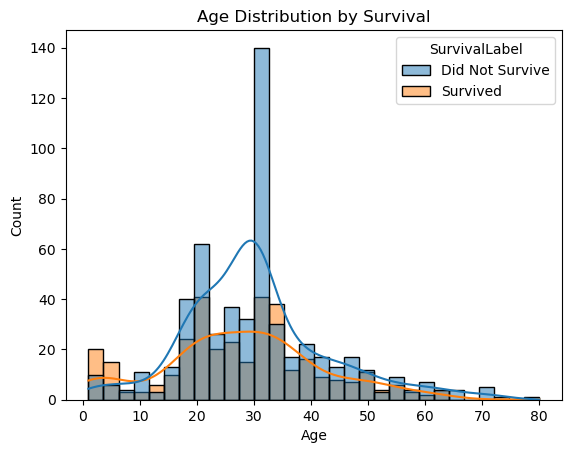

In [18]:
df["SurvivalLabel"] = df["Survived"].map({0: "Did Not Survive", 1: "Survived"})

plt.figure()
sns.histplot(
    data=df,
    x="Age",
    hue="SurvivalLabel",
    bins=30,
    kde=True
)

plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


**Observation:**  
The age distribution shows that younger passengers, particularly children, had higher survival rates.
Older passengers were less likely to survive, suggesting that age influenced evacuation priority and physical ability during the incident.


## Plot4 - Survival vs Fare

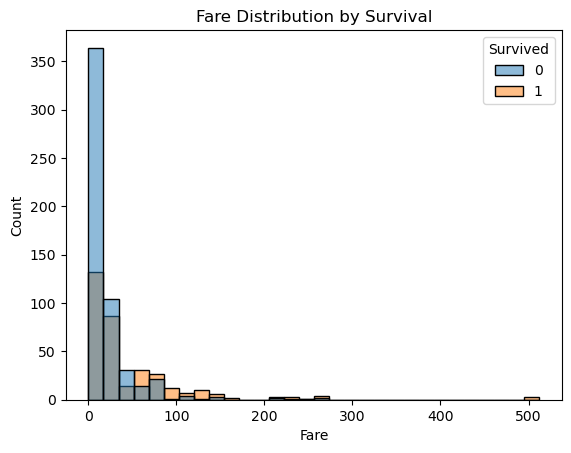

In [8]:
sns.histplot(data=df, x='Fare', hue='Survived', bins=30)
plt.title("Fare Distribution by Survival")
plt.show()


**Observation:**  
Passengers who paid higher fares generally had a higher chance of survival.
The box plot indicates that survivors have a higher median fare and more high-fare outliers.
This suggests that fare, which is strongly correlated with passenger class and onboard privileges, was an important factor in survival.


## EDA Summary

Exploratory Data Analysis revealed strong relationships between passenger survival and several
features. Female passengers and those traveling in higher classes exhibited significantly higher
survival rates. Age also played an important role, with younger passengers showing better survival
outcomes. Additionally, passengers who paid higher fares were more likely to survive.

These insights guided feature selection and engineering decisions for the predictive model.
